In [2]:
#importing required libraries
import yfinance as yf

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import plotly.express as px

from sklearn.linear_model import LinearRegression

This piece will delve into the intricacies of the Capital Asset Pricing Model, elucidating its significance for investors and providing a detailed walkthrough on employing it to determine the anticipated returns of volatile assets using historical figures. Upon conclusion, you'll gain a deeper comprehension of this critical financial formula and its practical application in making investment choices.


## Introduction:
The Capital Asset Pricing Model (CAPM) is an analytical tool that forecasts the potential return on an investment by assessing its risk in comparison to the broader market. The central purpose of utilizing the CAPM is to evaluate whether a security is priced appropriately given its associated risk level. A grasp of CAPM fundamentals can lead to more astute investment choices and a richer insight into market dynamics.

In the realm of financial analysis and asset appraisal, the CAPM is fundamental. It's a preferred method for appraising securities with inherent risk due to its straightforwardness, facilitating the comparison between different types of assets. Coupled with other strategies, such as Modern Portfolio Theory, the CAPM is invaluable for investment experts in comprehending portfolio risks and projected returns, thus guiding judicious investment decisions.

Conceived in the early 1960s by the financial economist William Sharpe, the CAPM expands on Harry Markowitz's earlier concepts.

Sharpe delineated two categories of risk:

1. **Systematic risk:** Commonly known as market risk, this is shaped by macroeconomic factors such as interest rates, inflation, economic downturns, and worldwide political events like wars. Systematic risk uniformly affects all financial assets.

2. **Unsystematic risk:** This pertains to risks that are specific to an individual asset.

The CAPM is instrumental for investors in understanding the interplay between systematic risk and anticipated returns.


## Capital Asset Pricing Model:
The Capital Asset Pricing Model (CAPM) serves as a theoretical framework that illustrates the pricing of financial securities by markets, influencing the expected returns on capital investments.

Here are the core elements that make up the CAPM:

1. Expected Return [ERi]: This is a calculated forecast of the potential earnings an investor might anticipate throughout the duration of an investment.

2. Risk-Free Rate [Rf]: This is the expected yield from an entirely riskless asset.

3. In India, for example, the yield on 10-year government bonds is considered the risk-free rate, underpinned by the Indian Government's guarantee.

4. Beta [β]: This metric evaluates the relative volatility—or risk level—of a stock against the market as a whole.
Beta < 1: Indicates that the stock poses less risk than the overall market.
Beta > 1: Suggests that the stock is more volatile than the market.
Beta = 1: Implies that the stock has a risk level equivalent to the market.

5. Alpha [α]: This metric reveals the additional returns a stock has generated over the market's performance.
Alpha > 0: Signifies that the stock has yielded higher returns than the market average.
Alpha < 0: Means the stock has performed worse than the market.
6. Market Risk Premium: This reflects the historical returns of the market where the stock is traded.
The CAPM is encapsulated by the following equation:

**ERi = Rf + β × (ERm - Rf)**

## Advantages of CAPM:
The CAPM enjoys widespread recognition and application within the financial sector, esteemed by both investors and analysts for its benefits:

1. One of the main advantages of the CAPM is its simplicity. It is straightforward to grasp and apply, necessitating only a single input, beta, which assesses the asset's volatility against the market at large.

2. Its robust theoretical underpinnings anchor the CAPM, aligning it with the principles of modern portfolio theory, which holds significant esteem in the financial world.

3. The CAPM serves as a standard for the required return, providing a basis for comparison with the prospective returns of specific assets. This comparison is instrumental in assessing the risk-return profile of diverse investment options.

## Disadvantages of CAPM:
While the CAPM is uncomplicated and prevalent, it carries certain constraints and drawbacks that need to be acknowledged in the context of investment strategies.

1. The CAPM is predicated on multiple suppositions, including the belief in efficient markets and rational behavior among investors, which do not invariably reflect real-world scenarios.

2. It takes into account solely one dimension of risk, denoted by beta, to forecast an asset's return. This singular focus may not comprehensively account for the full spectrum of an asset’s risk and potential earnings.

3. Designed predominantly for assets traded on public markets, like stocks, the CAPM might not be suitable for assessing other asset categories such as real estate or private investments.

## Alternatives Methods to Price Capital Assets:
Though the CAPM serves as a valuable instrument, there are numerous other models that can be utilized for valuing capital assets. Among the most frequently adopted alternatives to the CAPM are:

1. Arbitrage Pricing Theory (APT): APT posits that the expected returns on an asset are shaped by multiple factors, including the overarching market risk, sector-specific risks, and particular risks inherent to the company.

2. Fama-French Three-Factor Model: Conceived by Eugene Fama and Kenneth French, this approach builds on the CAPM by incorporating two extra factors into its evaluation: the scale of the firm and the book value of its assets.

Each framework presents its own set of advantages and limitations. There is no universally applicable method for valuing capital assets. A thorough examination of various elements and methodologies is crucial when deliberating investment choices.

## Calculating Expected Returns of Stocks using CAPM in Python:

## Getting Data:
To determine the risk-adjusted projected returns for selected stocks, it's necessary to acquire their historical performance data. For our evaluation, we will focus on the following stocks:

1. Bharti Airtel
2. HDFC Bank
3. ITC

In this study, our chosen benchmark is the NIFTY 50, which represents the performance of the 50 largest companies in the Indian Stock Market based on market capitalization.

We'll obtain the requisite data using the Python Yahoo Finance library, targeting a timespan of the previous 10 years.

In [3]:
#getting historic stock data from yfinance
stocks_list = ['BHARTIARTL.NS', 'ITC.NS', 'HDFCBANK.NS','^NSEI']

data = yf.download(stocks_list, period='10y')['Adj Close']

data.columns = ['BHARTIARTL','HDFCBANK', 'ITC','NIFTY_50']

[*********************100%%**********************]  4 of 4 completed


In [5]:
data.tail()

,BHARTIARTL,HDFCBANK,ITC,NIFTY_50
Date,,,,
2024-02-01,1151.199951,1466.349976,442.899994,21697.449219
2024-02-02,1150.800049,1446.150024,440.100006,21853.800781
2024-02-05,1113.550049,1444.849976,438.049988,21771.699219
2024-02-06,1134.050049,1444.099976,431.399994,21929.400391
2024-02-07,1136.699951,1440.300049,433.100006,22003.699219


## EDA of historic Data:

## Measure of Growth:

Before analyzing our data for insights, it's crucial to normalize the stock prices to ensure an efficient comparison can be made between different stocks.

In [6]:
#Normalizing Stock Prices

def normalize_prices(df):
  df_ = df.copy()
  for stock in df_.columns:
    df_[stock] = df_[stock]/df_[stock][0]
    return df_

norm_df = normalize_prices(data)

# Plotting the normalized stock prices

fig = px.line(title = "Normalized stock prices")

for stock in norm_df.columns:
  fig.add_scatter(x = norm_df.index.values, y = norm_df[stock], name = stock)

fig.show()

Based on the chart presented, it's apparent that

1. HDFC Bank has experienced the highest level of growth since 2018, with Bharti Airtel, NIFTY_50, and ITC following in sequence.

2. Bharti Airtel had a sluggish initial two years but then accelerated rapidly, aligning closely with the other stocks and the Benchmark Index thereafter.

## Measure of Volatility:


Text(0.5, 1.0, 'Daily returns of the stocks')

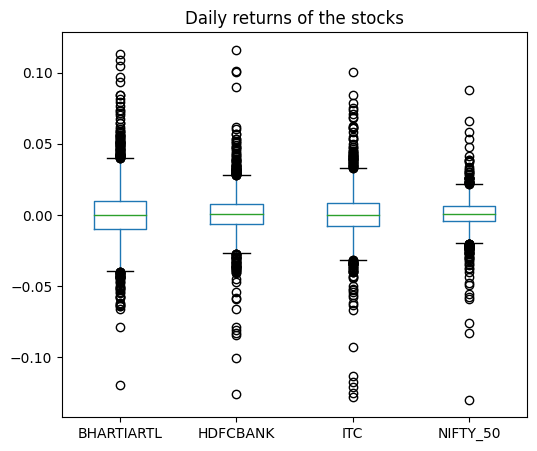

In [7]:
# Calculating Daily % change in stock prices

daily_returns = norm_df.pct_change()

daily_returns.iloc[0,:] = 0

# Boxplot of daily returns (in %)

daily_returns.boxplot(figsize=(6, 5), grid=False)

plt.title("Daily returns of the stocks")

## CAPM Model:

Next, we plot the daily stock returns alongside the benchmark and attempt to fit a regression line through the scattered data points.

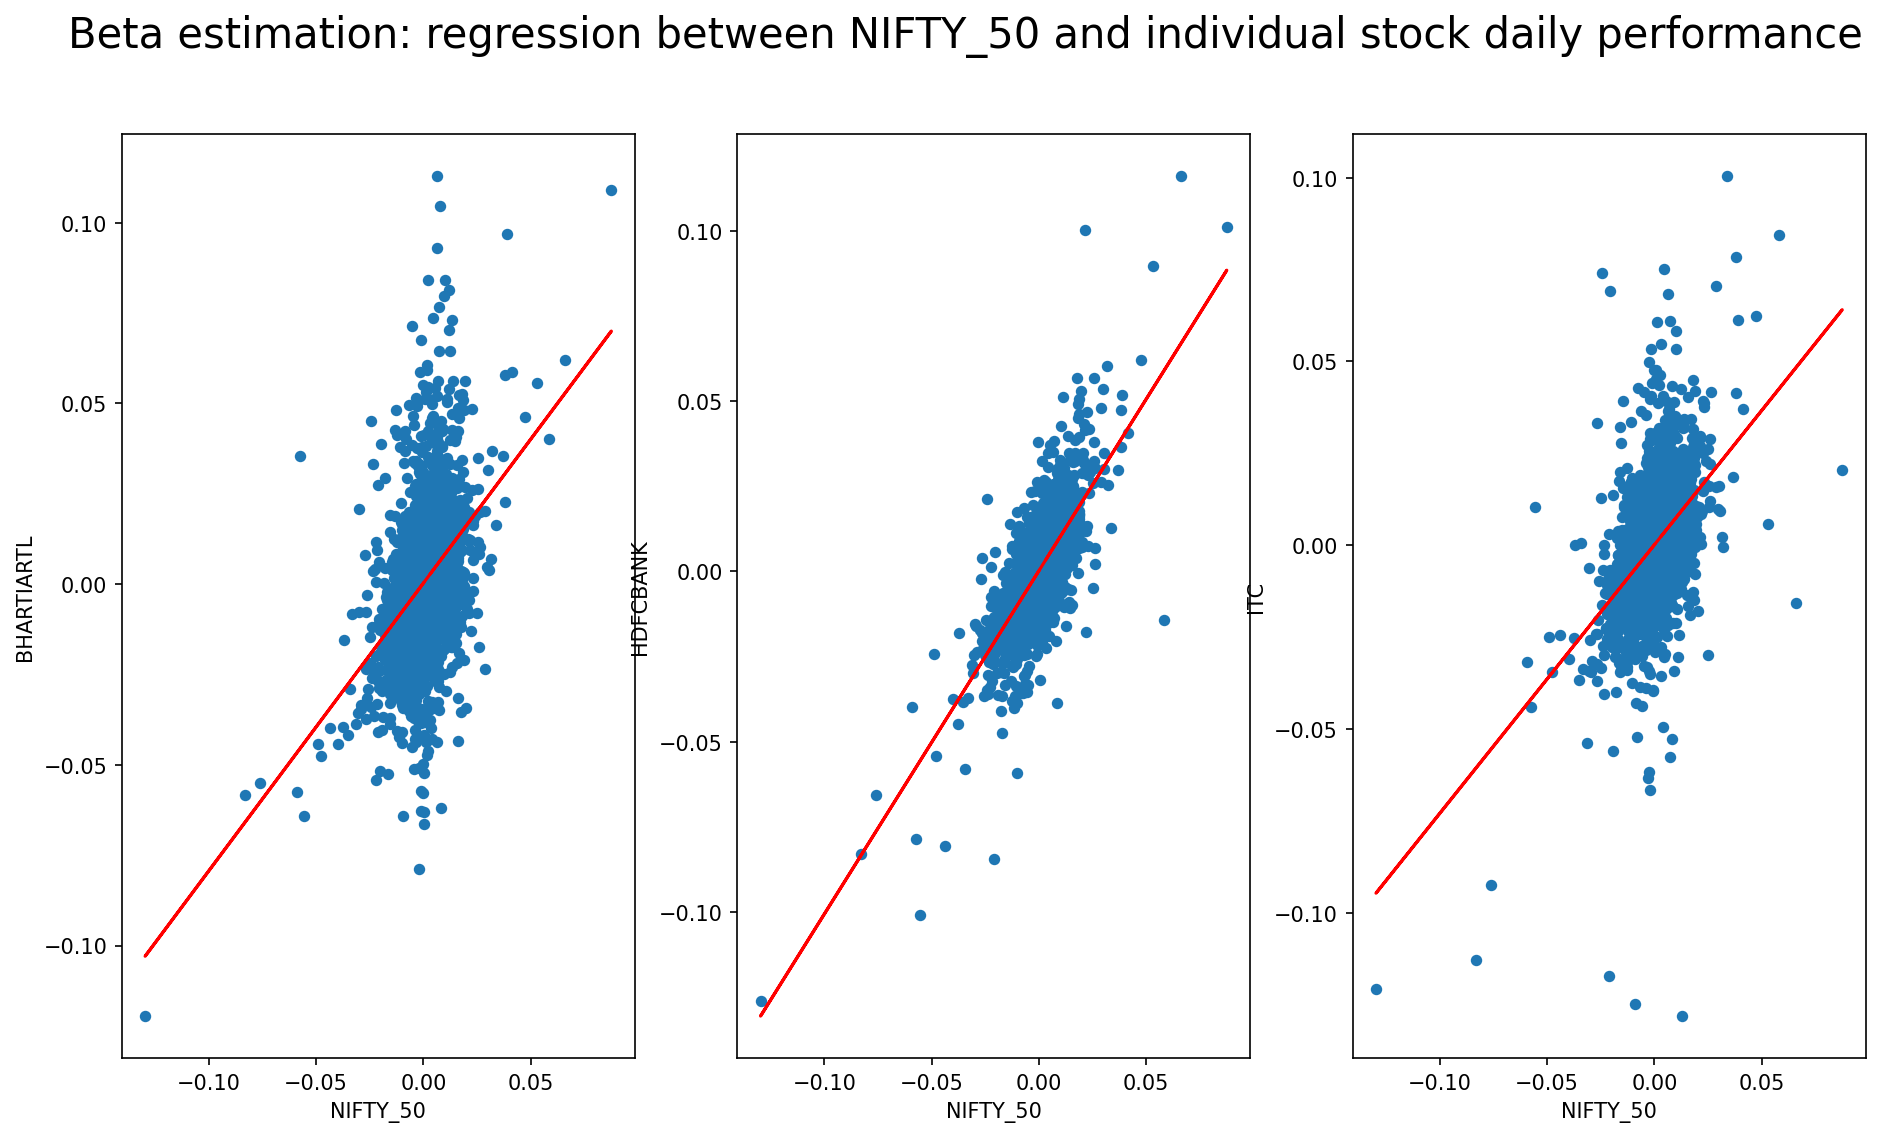

In [8]:
# Initializing empty dictionaries to save results

beta,alpha = dict(), dict()

# Make a subplot

fig, axes = plt.subplots(1,3, dpi=150, figsize=(15,8))

axes = axes.flatten()

# Loop on every daily stock return

for idx, stock in enumerate(daily_returns.columns.values[:-1]):
  # scatter plot between stocks and the NSE
  daily_returns.plot(kind = "scatter", x = "NIFTY_50", y = stock, ax=axes[idx])
  # Fit a line (regression using polyfit of degree 1)
  b_, a_ = np.polyfit(daily_returns["NIFTY_50"] ,daily_returns[stock], 1)
  regression_line = b_ * daily_returns["NIFTY_50"] + a_
  axes[idx].plot(daily_returns["NIFTY_50"], regression_line, "-", color = "r")
  # save the regression coeeficient for the current stock
  beta[stock] = b_
  alpha[stock] = a_

plt.suptitle("Beta estimation: regression between NIFTY_50 and individual stock daily performance", size=20)

plt.show()

The chart produced by the code depicts a scatterplot with a linear regression line overlaid. This scatterplot illustrates the correlation between the daily returns of the NIFTY_50 index and those of a specific stock.

1. The slope of the regression line indicates the beta value of the stock in question.

2. The point where the regression line intersects the y-axis reveals the stock's Alpha Value.

These beta and alpha figures are instrumental in evaluating the comparative risk and return profiles of various stocks, facilitating educated investment choices.

## Calculating Beta:

Previously mentioned, beta is an indicator of a stock's volatility in comparison to the benchmark index. In theory, beta is determined by the equation,

**Beta = cov (stock returns, market returns) / var (market returns)**

Additionally, the slope of a regression line provides the beta value of a stock, as determined from the previously mentioned code snippet.

We will now proceed to compute the beta values of stocks utilizing the aforementioned formula with Python.

In [9]:
keys = list(beta.keys())
beta_3 = dict()

for k in keys:
  beta_3[k] = [daily_returns[[k,'NIFTY_50']].cov()/daily_returns['NIFTY_50'].var()][0].iloc[0,1]

## Comparing expected return of stock prices with actual historical returns:

We will now compute the average annual returns produced by the stock based on historical data. This will allow us to assess their performance relative to the anticipated returns of the stock.

In [10]:
# Initialize the expected return dictionary

ER = dict()

rf = 0.0733

trading_days = 250

# Estimate the expected return of the market using the daily returns

rm = daily_returns["NIFTY_50"].mean() * trading_days

for k in keys:
  # Calculate return for every security using CAPM
  ER[k] = rf + beta[k] * (rm-rf)

for k in keys:
  print("Expected return based on CAPM model for {} is {}%".format(k, round(ER[k]*100, 2)))

# Calculating historic returns

for k in keys:
  print('Return based on historical data for {} is {}%'.format(k, round(daily_returns[k].mean() * 100 * trading_days, 2)))

Expected return based on CAPM model for BHARTIARTL is 12.99%
Expected return based on CAPM model for HDFCBANK is 14.49%
Expected return based on CAPM model for ITC is 12.52%
Return based on historical data for BHARTIARTL is 18.92%
Return based on historical data for HDFCBANK is 18.42%
Return based on historical data for ITC is 12.97%


## Conclusion:

To sum up, the Capital Asset Pricing Model (CAPM) serves as a significant instrument for determining the anticipated returns on assets, especially stocks. By incorporating key inputs such as the risk-free rate, stock beta, and expected market return, investors are equipped to forecast the potential return on their investments. This data is crucial for making well-informed choices regarding the purchase or sale of specific stocks.

Nevertheless, it's vital to acknowledge that the CAPM represents just one of many tools available, and a comprehensive evaluation of different aspects is essential in investment decision-making. Ultimately, this guide offers a detailed approach to employing the CAPM for estimating the expected returns on Indian stocks, presenting itself as an invaluable asset for investors.